In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_2015 = pd.read_csv("../datasets/marathon_results_2015.csv")
df_2016 = pd.read_csv("../datasets/marathon_results_2016.csv")
df_2017 = pd.read_csv("../datasets/marathon_results_2017.csv")
df = pd.concat([df_2015,df_2016, df_2017])
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN


In [23]:
df['Pace_in_sec'] = pd.to_timedelta(df['Pace']).dt.total_seconds()
df['Official_Time_in_sec'] = pd.to_timedelta(df['Official Time']).dt.total_seconds()
# df['Official_Time_in_sec'] = df['Official Time'].astype('timedelta64[ns]').df.total_seconds()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, 0 to 26409
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            53008 non-null  float64
 1   Bib                   79638 non-null  object 
 2   Name                  79638 non-null  object 
 3   Age                   79638 non-null  int64  
 4   M/F                   79638 non-null  object 
 5   City                  79637 non-null  object 
 6   State                 70645 non-null  object 
 7   Country               79638 non-null  object 
 8   Citizen               3440 non-null   object 
 9   Unnamed: 9            158 non-null    object 
 10  5K                    79638 non-null  object 
 11  10K                   79638 non-null  object 
 12  15K                   79638 non-null  object 
 13  20K                   79638 non-null  object 
 14  Half                  79638 non-null  object 
 15  25K                   79

In [25]:

#Correlation analysis on pace and official time

overall_corr = df[['Pace_in_sec', 'Official_Time_in_sec']].corr()
overall_corr

,Pace_in_sec,Official_Time_in_sec
Pace_in_sec,1.000000,0.999667
Official_Time_in_sec,0.999667,1.000000


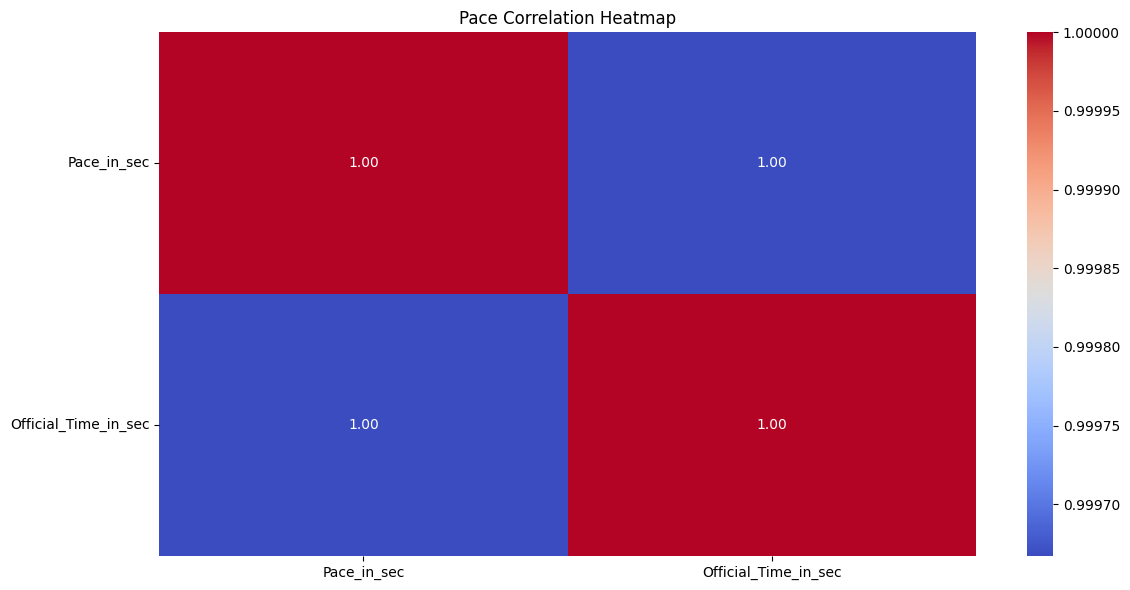

In [27]:
#Heatmap
plt.figure(figsize = (12,6))
# plt.subplot(1,2,1)
sns.heatmap(overall_corr, annot = True, fmt = '.2f', cmap = "coolwarm")
plt.title('Pace Correlation Heatmap')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()